In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For better display
pd.set_option('display.float_format', '{:.4f}'.format)

In [2]:
file_path = r"C:\Users\ADMIN\Downloads\NIFTY 50-01-01-2020-to-31-12-2025.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2025-12-31,25971.0500,26187.9500,25969.0000,26129.6000,246314941,20703.9900
1,2025-12-30,25940.9000,25976.7500,25878.0000,25938.8500,396893959,39492.3100
2,2025-12-29,26063.3500,26106.8000,25920.3000,25942.1000,234312888,18184.4500
3,2025-12-26,26121.2500,26144.2000,26008.6000,26042.3000,142243763,12263.0600
4,2025-12-24,26170.6500,26236.4000,26123.0000,26142.1000,188846828,17474.4400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1491 non-null   datetime64[ns]
 1   Open             1491 non-null   float64       
 2   High             1491 non-null   float64       
 3   Low              1491 non-null   float64       
 4   Close            1491 non-null   float64       
 5   Shares Traded    1491 non-null   int64         
 6   Turnover (₹ Cr)  1491 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 81.7 KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

In [6]:
df.describe()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
count,1491,1491.0000,1491.0000,1491.0000,1491.0000,1491.0000,1491.0000
mean,2022-12-29 21:38:59.637827072,18558.7018,18645.6036,18447.6978,18549.4588,377108307.0959,27609.6835
min,2020-01-01 00:00:00,7735.1500,8036.9500,7511.1000,7610.2500,19064566.0000,1572.7700
25%,2021-06-29 12:00:00,15727.1750,15781.2250,15640.3500,15715.4500,250854144.5000,21450.9900
50%,2022-12-28 00:00:00,17974.8500,18087.8000,17884.6000,17999.2000,305510740.0000,26093.3800
75%,2024-07-02 12:00:00,22834.5500,22983.3500,22750.1500,22896.3000,458824439.0000,32088.2400
max,2025-12-31 00:00:00,26325.8000,26325.8000,26172.4000,26216.0500,1811564187.0000,93786.4400
std,NaN,4699.9142,4706.1782,4699.7777,4702.7933,190419821.4575,9005.2649


In [7]:
df['Daily_Return_%'] = df['Close'].pct_change() * 100

In [8]:
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

In [9]:
df['Intraday_Range'] = df['High'] - df['Low']

In [10]:
df['Intraday_Range_%'] = ((df['High'] - df['Low']) / df['Open']) * 100

In [11]:
df[['Date', 'Close', 'Daily_Return_%', 'Intraday_Range_%']].head(10)

,Date,Close,Daily_Return_%,Intraday_Range_%
0,2020-01-01,12182.5000,NaN,0.4663
1,2020-01-02,12282.2000,0.8184,0.7759
2,2020-01-03,12226.6500,-0.4523,0.6056
3,2020-01-06,11993.0500,-1.9106,1.6836
4,2020-01-07,12052.9500,0.4995,1.2153
5,2020-01-08,12025.3500,-0.2290,0.9662
6,2020-01-09,12215.9000,1.5846,0.7529
7,2020-01-10,12256.8000,0.3348,0.7986
8,2020-01-13,12329.5500,0.5935,0.4225
9,2020-01-14,12362.3000,0.2656,0.5315


In [12]:
return_stats = {
    "Mean_Return_%": df['Daily_Return_%'].mean(),
    "Median_Return_%": df['Daily_Return_%'].median(),
    "Volatility_%": df['Daily_Return_%'].std(),
    "Skewness": df['Daily_Return_%'].skew(),
    "Kurtosis": df['Daily_Return_%'].kurtosis()
}

pd.Series(return_stats)

Mean_Return_%      0.0578
Median_Return_%    0.0879
Volatility_%       1.1382
Skewness          -1.3510
Kurtosis          20.0034
dtype: float64

In [13]:
df['Year'] = df['Date'].dt.year

In [14]:
yearly_return_stats = df.groupby('Year')['Daily_Return_%'].agg(
    Avg_Daily_Return='mean',
    Best_Day_Return='max',
    Worst_Day_Return='min'
).reset_index()

yearly_return_stats

,Year,Avg_Daily_Return,Best_Day_Return,Worst_Day_Return
0,2020,0.0746,8.7632,-12.9805
1,2021,0.0920,4.7423,-3.7636
2,2022,0.0230,3.0259,-4.7781
3,2023,0.0761,2.0668,-1.6074
4,2024,0.0379,3.3624,-5.9294
5,2025,0.0429,3.8183,-3.2433


In [15]:
yearly_volatility = df.groupby('Year')['Daily_Return_%'].std().reset_index()
yearly_volatility.rename(columns={'Daily_Return_%': 'Volatility_%'}, inplace=True)

yearly_volatility

,Year,Volatility_%
0,2020,1.9709
1,2021,0.9861
2,2022,1.0915
3,2023,0.6185
4,2024,0.8806
5,2025,0.7440


In [16]:
intraday_vol = df.groupby('Year')['Intraday_Range_%'].mean().reset_index()
intraday_vol.rename(columns={'Intraday_Range_%': 'Avg_Intraday_Range_%'}, inplace=True)

intraday_vol

,Year,Avg_Intraday_Range_%
0,2020,1.8090
1,2021,1.1871
2,2022,1.2074
3,2023,0.8068
4,2024,1.0167
5,2025,0.8770


In [17]:
yearly_summary = yearly_return_stats.merge(yearly_volatility, on='Year') \
                                    .merge(intraday_vol, on='Year')

yearly_summary

,Year,Avg_Daily_Return,Best_Day_Return,Worst_Day_Return,Volatility_%,Avg_Intraday_Range_%
0,2020,0.0746,8.7632,-12.9805,1.9709,1.8090
1,2021,0.0920,4.7423,-3.7636,0.9861,1.1871
2,2022,0.0230,3.0259,-4.7781,1.0915,1.2074
3,2023,0.0761,2.0668,-1.6074,0.6185,0.8068
4,2024,0.0379,3.3624,-5.9294,0.8806,1.0167
5,2025,0.0429,3.8183,-3.2433,0.7440,0.8770


In [18]:
yearly_summary[['Year', 'Avg_Daily_Return', 'Volatility_%']]

,Year,Avg_Daily_Return,Volatility_%
0,2020,0.0746,1.9709
1,2021,0.0920,0.9861
2,2022,0.0230,1.0915
3,2023,0.0761,0.6185
4,2024,0.0379,0.8806
5,2025,0.0429,0.7440


In [19]:
df['Volatility_30D'] = df['Daily_Return_%'].rolling(window=30).std()
df['Volatility_90D'] = df['Daily_Return_%'].rolling(window=90).std()

In [20]:
df[['Date', 'Daily_Return_%', 'Volatility_30D', 'Volatility_90D']].tail(10)

,Date,Daily_Return_%,Volatility_30D,Volatility_90D
1481,2025-12-17,-0.1607,0.4810,0.5105
1482,2025-12-18,-0.0116,0.4759,0.5105
1483,2025-12-19,0.5843,0.4855,0.5022
1484,2025-12-22,0.7933,0.5016,0.5002
1485,2025-12-23,0.0181,0.4961,0.4977
1486,2025-12-24,-0.1339,0.4822,0.4957
1487,2025-12-26,-0.3818,0.4882,0.4980
1488,2025-12-29,-0.3848,0.4934,0.4901
1489,2025-12-30,-0.0125,0.4877,0.4885
1490,2025-12-31,0.7354,0.5003,0.4934


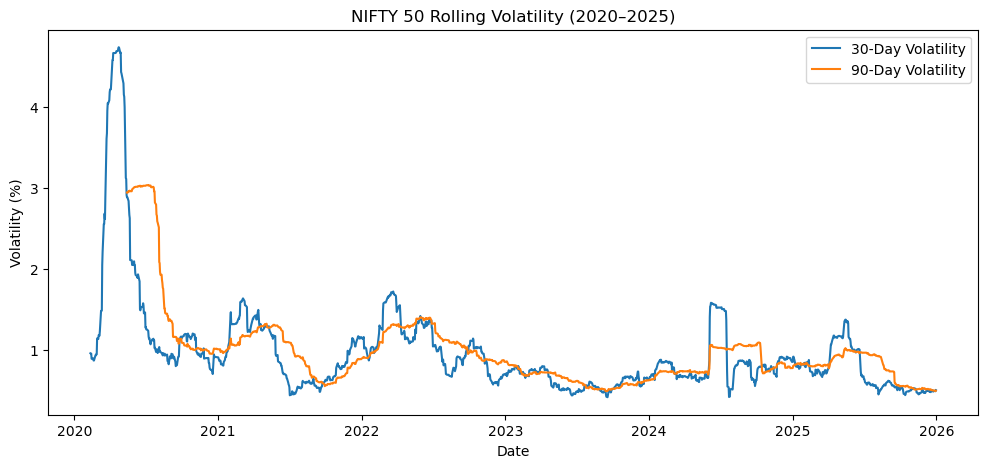

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volatility_30D'], label='30-Day Volatility')
plt.plot(df['Date'], df['Volatility_90D'], label='90-Day Volatility')
plt.title('NIFTY 50 Rolling Volatility (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

In [22]:
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

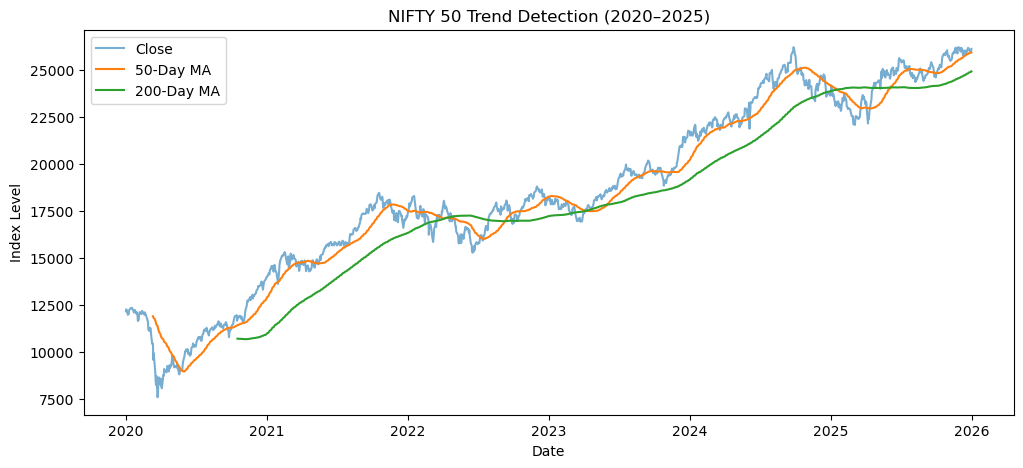

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.6)
plt.plot(df['Date'], df['MA_50'], label='50-Day MA')
plt.plot(df['Date'], df['MA_200'], label='200-Day MA')
plt.title('NIFTY 50 Trend Detection (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Index Level')
plt.legend()
plt.show()

In [25]:
yearly_liquidity = df.groupby('Year').agg(
    Avg_Shares_Traded=('Shares Traded', 'mean'),
    Avg_Turnover_Cr=('Turnover (₹ Cr)', 'mean')
).reset_index()

yearly_liquidity

,Year,Avg_Shares_Traded,Avg_Turnover_Cr
0,2020,660962048.3056,30830.5344
1,2021,423328028.0444,28927.1021
2,2022,279551915.1694,22186.4958
3,2023,265832970.7683,23618.0767
4,2024,317134516.8750,32510.5930
5,2025,310632742.1526,27501.5954


In [26]:
vol_threshold = df['Daily_Return_%'].std()

df['High_Volatility_Day'] = df['Daily_Return_%'].abs() > vol_threshold

In [28]:
liquidity_volatility_compare = df.groupby('High_Volatility_Day').agg(
    Avg_Shares_Traded=('Shares Traded', 'mean'),
    Avg_Turnover_Cr=('Turnover (₹ Cr)', 'mean')
)

liquidity_volatility_compare

,Avg_Shares_Traded,Avg_Turnover_Cr
High_Volatility_Day,,
False,350659445.3827,26610.2189
True,497805911.1082,32170.6731


In [30]:
correlation_results = {
    "Return_vs_Shares": df['Daily_Return_%'].corr(df['Shares Traded']),
    "Return_vs_Turnover": df['Daily_Return_%'].corr(df['Turnover (₹ Cr)'])
}

pd.Series(correlation_results)

Return_vs_Shares     -0.0532
Return_vs_Turnover   -0.0015
dtype: float64

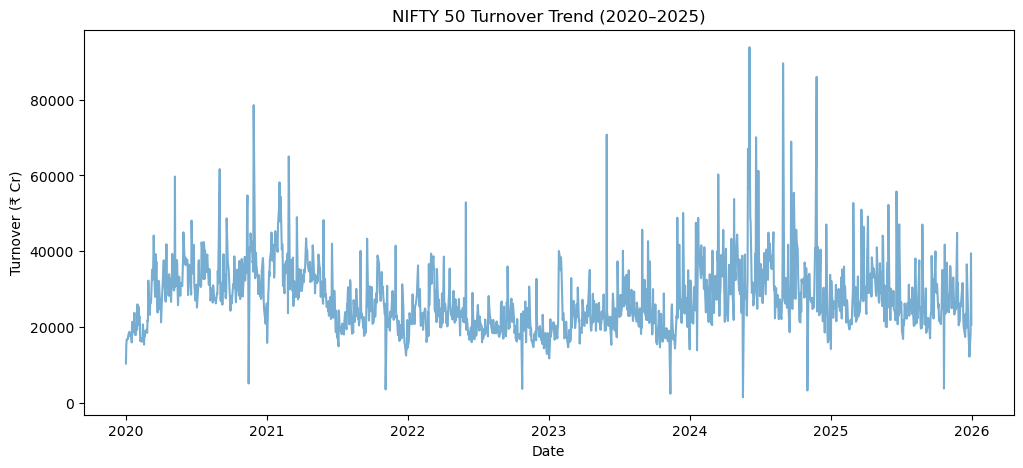

In [32]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Turnover (₹ Cr)'], alpha=0.6)
plt.title('NIFTY 50 Turnover Trend (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Turnover (₹ Cr)')
plt.show()

In [33]:
yearly_summary.to_csv("Yearly_Market_Summary_2020_2025.csv", index=False)

In [35]:
daily_features = df[[
    'Date', 'Close', 'Daily_Return_%',
    'Volatility_30D', 'Volatility_90D',
    'Shares Traded', 'Turnover (₹ Cr)'
]]

daily_features.to_csv("Daily_Market_Features_2020_2025.csv", index=False)

In [36]:
liquidity_volatility_compare.reset_index().to_csv(
    "Liquidity_Volatility_Comparison.csv", index=False
)

In [37]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_returns = df.groupby('Month')['Daily_Return_%'].mean().reset_index()
monthly_returns.to_csv("Monthly_Returns.csv", index=False)